In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Introduction

This Dataset describes the Medical records for PIMA Indians and whether each patient will have Diabetes onset within five years. The Pima are a group of Native Americans living in Arizona. A genetic predisposition allowed this group to normally survive a low carbohydrate diet for years. In recent years, due to a sudden shift from traditional agricultural crops to processed foods, coupled with a decline in physical activity, they have developed the highest prevalence of type 2 diabetes and, for this reason, have been the subject of many studies.

It’s a common 2 class classification problem like classifying mail into spam and ham based on the contents of the email.  Obviously, the attributes there would be strings and not numbers like this dataset, therefore the way in which we process at least some of the features will be different.

### Assumptions

This is enough data to split and reliably predict if the patient has diabetes, the dataset has only 786 data points.
Just these attributes are enough to diagnose the ailment.

### Data Overview

Let’s pull in the data and see what's in it, here is what we already know about this data.  The dataset contains the following columns:

* Pregnancies			- Number of times pregnant
* Glucose				- Plasma glucose concentration 2 hours in an oral glucose tolerance test
* Blood Pressure			- Diastolic blood pressure (mm Hg)
* Skin Thickness			- Triceps skin fold thickness (mm)
* Insulin				- 2-Hour serum insulin (mu U/ml)
* BMI				- Body mass index (weight in kg/(height in m)^2)
* Diabetes Pedigree Function	- Diabetes pedigree function
* Age				- Age (years)
* Outcome			- Class value (0 or 1), 1 is interpreted as "tested positive for diabetes

In [22]:
df = pd.read_csv('C:/PROYFINAL/diabetes_titulos.csv')
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

## Analysis

Based on the description above, Plasma glucose levels, blood pressure, skin thickness, insulin and BMI all have min values at 0, those values should not be valid, especially blood pressure, since the diastolic blood pressure most likely cannot be 0 for a living person.  

### Blood Pressure:

Any diastolic blood pressure under 60 is considered hypotension which needs to be treated immediately as it indicates not enough blood is reaching the person's organs, the person is in "shock".

### Glucose:

The normal range for glucose levels is between 3.9 to 7.2 for non-diabetic patients even after fasting. Given this, the 0s here are not valid either.

### Skin Thickness:

For normal healthy adults the skin fold thickness is not less than 10mm even for girls.

### BMI:

BMI among adults range from 18.5 to 30.0 or higher.  Assuming none of these women are extremely short or extremely underweight the BMI should not be 0 or close to 0.5.

### Insulin:

In some rare cases a person can have zero insulin but they almost definitely have diabetes, which doesn't seem to be the case as per the data since 236 cases have insulin value 0 but are classified to not having diabetes.

* Let’s also visualize these features to see how the Outcome is related to each of them.

C:\Users\vmolina\Anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


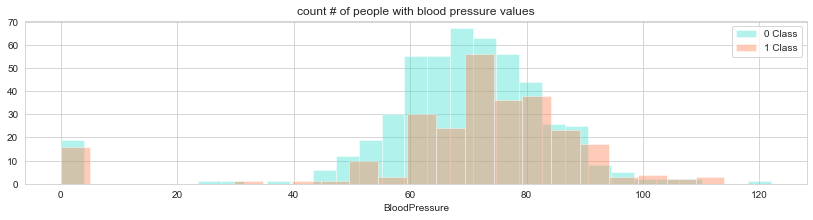

In [24]:
plt.figure(figsize=(14,3))
bp_pivot = df.groupby('BloodPressure').Outcome.count().reset_index()
sns.distplot(df[df.Outcome == 0]['BloodPressure'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df[df.Outcome == 1]['BloodPressure'], color='coral', kde=False, label='1 Class')
plt.legend()
plt.title('count # of people with blood pressure values')
plt.show()

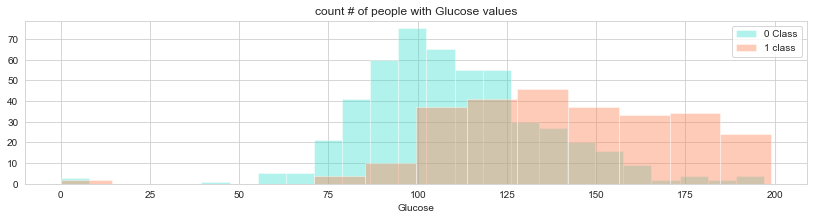

In [25]:
plt.figure(figsize=(14,3))
glucose_pivot = df.groupby('Glucose').Outcome.count().reset_index()
sns.distplot(df[df.Outcome == 0]['Glucose'], color='turquoise', kde=False, label='0 Class')
sns.distplot(df[df.Outcome == 1]['Glucose'], color='coral', kde=False, label='1 class')
plt.legend()
plt.title('count # of people with Glucose values')
plt.show()

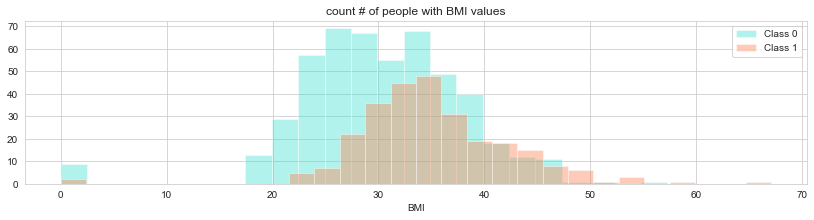

In [26]:
plt.figure(figsize=(14,3))
BMI_pivot = df.groupby('BMI').Outcome.count().reset_index()
sns.distplot(df[df.Outcome == 0]['BMI'], color='turquoise', kde=False, label='Class 0')
sns.distplot(df[df.Outcome == 1]['BMI'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with BMI values')
plt.show()

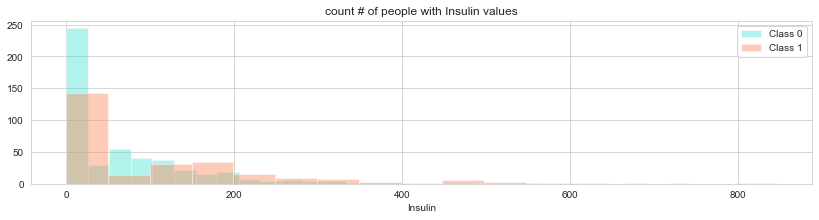

In [27]:
plt.figure(figsize=(14,3))
Insulin_pivot = df.groupby('Insulin').Outcome.count().reset_index()
sns.distplot(df[df.Outcome == 0]['Insulin'], color='turquoise', kde=False, label='Class 0')
sns.distplot(df[df.Outcome == 1]['Insulin'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with Insulin values')
plt.show()

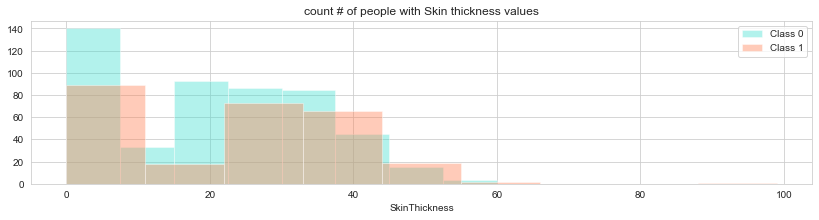

In [28]:
plt.figure(figsize=(14,3))
SkinThickness_pivot = df.groupby('SkinThickness').Outcome.count().reset_index()
sns.distplot(df[df.Outcome == 0]['SkinThickness'], color='turquoise', kde=False, label='Class 0')
sns.distplot(df[df.Outcome == 1]['SkinThickness'], color='coral', kde=False, label='Class 1')
plt.legend()
plt.title('count # of people with Skin thickness values')
plt.show()

* For the time being we are not removing the outlier in the data specifically BP, insulin and glucose because they 
are reletively few of them in the data. We see that these are the 3 features which seem to be effecting the classification 
the most, given this we will use them for the initial model, without any regularization.  We will also normalize
all the values since they are numeric and vary in their min and max values. Finally we are going to split the data into 
an 80-20 split for train and test sets and perform 5-fold cross validation of the training data to pic the best classifier 
for the job which will then be used for getting test predictions. I am using 5 classifiers that I know the theory behind.

In [29]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix

In [33]:
df_mod = df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]
train, test = train_test_split(df_mod, test_size=0.2)

In [34]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'\
            , 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction']
target = 'Outcome'
classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]
classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes'
]

In [35]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, train[features], train[target], cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

K nearest neighbors  mean accuracy:  71.513 % std:  0.281 %
Decision Tree Classifier  mean accuracy:  70.304 % std:  0.178 %
SVM classifier with RBF kernel  mean accuracy:  75.135 % std:  0.052 %
SVM classifier with linear kernel  mean accuracy:  76.169 % std:  0.042 %
Gaussian Naive Bayes  mean accuracy:  75.471 % std:  0.066 %


In [37]:
final_model_smv_lin = SVC(kernel='linear').fit(train[features], train[target])
final_model_gnb = gnb().fit(train[features], train[target])

test accuracy for SVM classifier with a linear kernel: 77.24 %


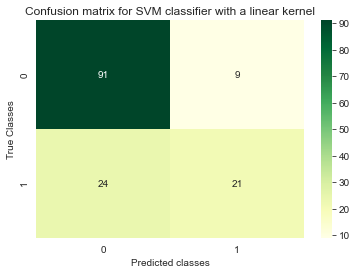

test accuracy for Gaussian naive bayes classifier: 73.1 %


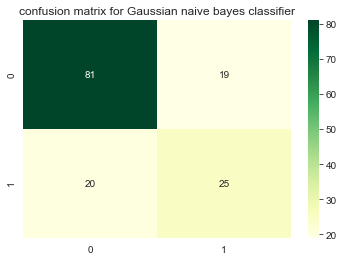

In [38]:
y_hat_svm = final_model_smv_lin.predict(test[features])
y_hat_gnb = final_model_gnb.predict(test[features])

print('test accuracy for SVM classifier with a linear kernel:'\
      , round(accuracy_score(test[target], y_hat_svm)*100, 2), '%')
plt.title('Confusion matrix for SVM classifier with a linear kernel')
sns.heatmap(confusion_matrix(test[target], y_hat_svm), annot=True, cmap="YlGn")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

print('test accuracy for Gaussian naive bayes classifier:', \
      round(accuracy_score(test[target], y_hat_gnb)*100, 2),'%')
plt.title('confusion matrix for Gaussian naive bayes classifier')
sns.heatmap(confusion_matrix(test[target], y_hat_gnb), annot=True, cmap="YlGn")
plt.show()


In [39]:
import pickle
with open ('diabetes_pickle.pkl','wb') as f:
    pickle.dump(final_model_smv_lin,f)

## Conclusions

* As shown above, the SVM linear model does seem to do much better from an accuracy perspective for the data. It also has fewer false positives than the Naive Bayes model although higher true negative predictions.  We could also choose based on if we want the model to err on the side of caution when predicting someone will have diabetes so that they take preventive care or be more cautious when predicting diabetes diagnosis. This will depend on what application this classifier.